# Customer Segmentation 

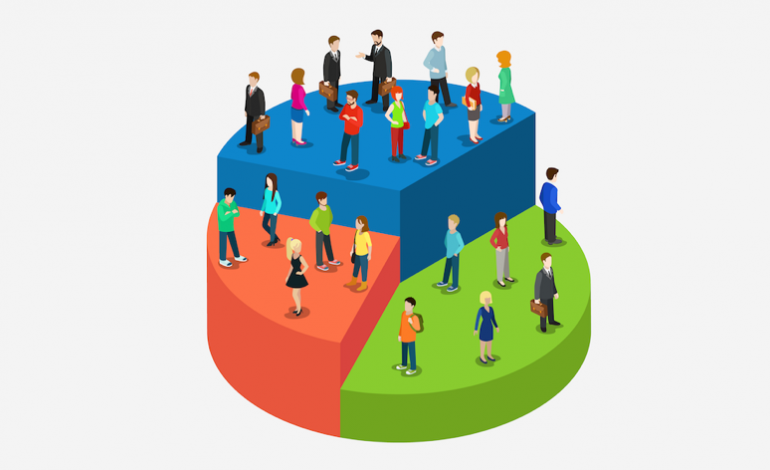

<b> What is customer segmentation ?</b>

Customer segmentation is a way for organizations to understand their customers by grouping people according to various characteristics and features which makes discriminating possible. 

It can be done by dividing roughly the features in four distinct groups which consist of: 

    - Demographic characteristics such as occupation, gender, age, or maritial status.
    - Geographic characteristics such as location, region or type of neighbourhood.
    - Psychographic characteristics such as social class, lifestyle and personality traits.
    - Behavioral characteristics such as spending, consumption habits, product/service usage and previously purchased products.

<b> Why is it important to know ?</b>

The more knowledge you have of your current or future and potential customers, the better chances you have of meeting their expectations. Knowing and identifying the most potential and best customers has an impact on customer satisfaction and retention, and makes it easier to acquire new ones. These all lead to increased revenue and growth through better quality service that comes from better understanding the needs of each customer segment.

<b> Scenario </b>

The data set comes from an eCommerce platform that sells different kinds of goods to people around the world. The goal is to segment these customers into groups so we can run more targeted adds to the specific customers and also know what kind of goods we should have in our warehouse  for the upcoming year so that we could maximize our revenues.

## Outline for Customer Segmentation

1. Framing the Problem
2. Preparing the Data
3. Exploratory Data Analysis
4. Feature Engineering
5. Customer Segmentation Analysis
6. Drawing Conclusions

## 1. Framing the Problem

We have two different questions that need to be answered. First, we want to know better our customers in order to increase customer satisfaction in meeting their expectations and increasing sales, and second, we want to know better beforehand what kind of goods our customers are buying from us in order to become more cost-efficient by decreasing the costs of logistics and warehousing, and also in meeting our customers expectation in order to increase customer satisfaction with quick deliviers of quality products.

We will try two different techniques to help tackle these issues. First, we will use a marketing technique called the RFM analysis (Recency, Frequency and Monetary value) which is a behavior-based approach that groups customers based on their purchase history in order to try to segment the customers from the most valuable to the least valuable. This means we will create labels for each customer with numerical calculations that will help us to segment the customers into separate groups. 

After this, we will perform feature engineering by using an unsupervised learning technique with the K-means algorithm that clusters the products into  groups by using the square of the Euclidean distance (i.e. L2 distance - shortest distance from one point to another). There are a number of different clustering techniques that could be used, but since the data set doesn't contain many features, and thus is not very high dimensional, we can use the K-means technique that scales well with large data sets by producing results that are also easy to interpret. 

We will then combine the results and draw conclusions by answering the two questions that were set in the beginning that focused on gathering as much details as possible from our customers and the products we are selling. 

<b> RFM Analysis </b>

The RFM analysis focuses on recency where we want to know how recently a customer bought something, followed by frequency where we want to know how often these purchases have happened, and ending with monetary value of the purchase.

Each of the three variables consist of four groups so there will be 64 different customer segment combinations that can be made where each segment will have a positional RFM score ranging from the highest 111 to 444 being the lowest. This score thus shows the position of each category compared to each customer segment. 

<b> Plan for RFM Analysis</b>

1. Calculate a RFM table with the Recency, Frequency, and Monetary values for each customer.
2. Add segment bin values to RFM table using quantiles. Here, the customers with the lowest recency, and the highest frequency and monetary values are considered as the top customers.
3. Sort the customer RFM score in ascending order for discriminating the different segments.

<b> K-Means Clustering for Feature Engineering</b>

Unsupervised machine learning differs from superviced learning in that the algorithms discover patterns in the data set from unlabelled data. This way, we don't need to make calculations similar to the RFM analysis for example, but rather let the algorithm interpret the data in order to find clusters for us. We will use this technique by creating some variables that we can later use to analyze the different customer and product segments.

There are a number of ways to perform the interpretation but all the different techniques share the same idea that we try to group the data points based on a similarity measure that all data points in a particular cluster share something in common.  In the case of K-means, this similarity measure is the distance from the cluster points to its center, or centroid point. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster-sum-of-squares criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

<b> Plan for Feature Engineering </b>

1. Use Natural Language Processing (NLP) to extract product categories.
2. Compute products into sparse vectors and other categorical variables into mappings.
3. Perform K-means algorithm for the sparse vector matrix to predict the right number of clusters of products.

<b> The Number of Clusters </b>

The way to determine the number of clusters usually varies with the different clustering methods. This is where we can usually combine domain knowledge together by evaluating the differences between having a certain number of clusters.

In the case of the K-means algorithm, we can look at the decrease in inertia each time we form a new cluster for the data points. Once we see the decrease of inertia stalling considerably we have found the right number of clusters. Moreover, inertia is a measure of how well the data set is clustered by the K-means algorithm. It is the sum of the squared error for each cluster where the denser the data points inside the clusters are formed, the smaller the inertia will be. We will thus try to achieve a low value as possible but by not at the expense of creating too many clusters. For this, we will use the Silhoutte Score which ranges from -1 to 1, indicating how close or far away the clusters are from each other and how dense the clusters are to make a comparison. We will then combine the knowledge gained from both of these techniques in order to perform the RFM analysis. 

In [1053]:
# Importing relevant modules

import shutil
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Modeling tools

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, Normalizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# NLP

import nltk

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# plot styling preferences

%matplotlib inline
plt.style.use('seaborn-whitegrid')

font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 12, 6

# 2. Preparing the Data

In [2]:
# Unpacking zip and reading dataframe

shutil.unpack_archive("data/data.csv.zip", "data")
pd.set_option('max_columns', None)
df = pd.read_csv('data/data.csv', encoding="ISO-8859-1", parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Checking for null values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We cannot fill the missing customer ids with any values and we have a large data set so we will continue by dropping all these missing values.

In [5]:
# Dropping null values from missing customer ids

df.dropna(axis=0, subset=['CustomerID'], inplace=True)
df.shape

(406829, 8)

In [6]:
# Checking for missing values

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

It seems the missing values of the customer ids and description were on the same rows so we don't need to do anything further, but to continue the cleaning-up process by checking for duplicates.

In [7]:
# Checking for duplicates

df.duplicated().sum()

5225

In [8]:
# Dropping all duplicates

df.drop_duplicates(inplace=True)
df.shape

(401604, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


The minimum values for quantity and unit price look a bit odd so we will have a closer look at these.

In [10]:
# Checking the number of values for quantity that are negative

df[df['Quantity'] <= 0].sum(axis=1).count()

8872

In [11]:
# Showing a sample of the negatives

df[df['Quantity'] < 0].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154459,C549912,20725,LUNCH BAG RED RETROSPOT,-1,2011-04-13 09:02:00,1.65,15737.0,United Kingdom
394045,C570867,22048,BIRTHDAY BANQUET GIFT WRAP,-25,2011-10-12 16:17:00,0.42,12607.0,USA
255448,C559347,21673,WHITE SPOT BLUE CERAMIC DRAWER KNOB,-24,2011-07-07 17:22:00,1.25,18072.0,United Kingdom
192800,C553478,22847,BREAD BIN DINER STYLE IVORY,-1,2011-05-17 11:47:00,16.95,17677.0,United Kingdom
111578,C545773,21843,RED RETROSPOT CAKE STAND,-1,2011-03-07 12:06:00,10.95,17139.0,United Kingdom


The quantities cannot have a negative number and as we have plenty of data so we will just drop all these rows.

In [12]:
# Boolean mask to drop the negative values

df = df[df['Quantity'] > 0]
df.shape

(392732, 8)

In [13]:
# Checking the number of values for unit price that are zero

df[df['UnitPrice'] == 0].sum(axis=1).count()

40

In [14]:
# Showing a sample of where the unit price is zero

df[df['UnitPrice'] == 0].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.0,15581.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom
157042,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2011-04-14 18:57:00,0.0,12457.0,Switzerland


As there aren't many rows of data which have a zero unit price we will proceed by dropping also these rows from the data.

In [15]:
# Boolean mask to get rid of the zero unit price rows

df = df[df['UnitPrice'] != 0]
df.shape

(392692, 8)

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Now the data is cleaned and all ready.

## 3. Exploratory Data Analysis

We already had a glimpse of the quantitative variables such as quantity, unit price and customer id, so now we have a closer look at the other variables to have a better sense of what has been sold.

In [17]:
# Checking timeframe

df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

The timeframe shows that all orders have been made in a time span of one year. We will create a timestamp to indicate when the timeframe stops that will help with making the calculations later on and proceed analyzing the other variables.

In [18]:
# Timestamp for the end of the timeframe

PRESENT = dt.datetime(2011, 12, 10)
PRESENT

datetime.datetime(2011, 12, 10, 0, 0)

In [19]:
# Checking the unique number of items

df['StockCode'].nunique()

3665

In [20]:
# Checking the unique number of customers

df['CustomerID'].nunique()

4338

In [21]:
# Checking total sales

df['total_sales'] = df['Quantity'] * df['UnitPrice']
df['total_sales'].sum()

8887208.894

The platform has sold for around €8.9M worth of goods that consisted of 3665 different items for 4338 unique customers. Next we will check where the customers are coming from.

In [22]:
# Checking countries of customers

df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

The majority of the customers come from the UK and Europe. There is also an unspecified category so let's have a look what that consists.

In [23]:
# Showing a sample of the unspecified country category

df[df['Country'] == 'Unspecified'].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
282769,561658,84549,CROCHET WHITE RABBIT KEYRING,1,2011-07-28 16:06:00,1.65,12743.0,Unspecified,1.65
308307,563947,23318,BOX OF 6 MINI VINTAGE CRACKERS,12,2011-08-22 10:18:00,2.49,12363.0,Unspecified,29.88
263007,559929,46000M,POLYESTER FILLER PAD 45x45cm,18,2011-07-14 09:10:00,1.55,14265.0,Unspecified,27.90
282780,561658,23055,IVORY CHANDELIER T-LIGHT HOLDER,1,2011-07-28 16:06:00,6.25,12743.0,Unspecified,6.25
282850,561661,21591,COSY HOUR CIGAR BOX MATCHES,1,2011-07-28 16:21:00,1.25,12743.0,Unspecified,1.25


In [24]:
# Showing the all the different customers that are indicated as unspecified in the country category

df[df['Country'] == 'Unspecified']['CustomerID'].value_counts()

12743.0    131
16320.0     56
14265.0     31
12363.0     23
Name: CustomerID, dtype: int64

There are 241 sales from 4 users where the country has been marked as unspecified. As the country consists of the geographic charasteristic that will be used to segment the customers and as there are only a small number of customers coming from an unspecified location, we will drop these rows from the data set.

In [25]:
# Boolean mask to drop the unspecified rows

df = df[df['Country'] != 'Unspecified']
df.shape

(392451, 9)

In [26]:
# Checking the total sales in each country

total_sales_per_country = df.groupby('Country')['total_sales'].sum().sort_values(ascending=False).round(2)
total_sales_per_country

Country
United Kingdom          7285024.64
Netherlands              285446.34
EIRE                     265262.46
Germany                  228678.40
France                   208934.31
Australia                138453.81
Spain                     61558.56
Switzerland               56443.95
Belgium                   41196.34
Sweden                    38367.83
Japan                     37416.37
Norway                    36165.44
Portugal                  33375.84
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20440.54
Denmark                   18955.34
Italy                     17483.24
Cyprus                    13502.85
Austria                   10198.68
Poland                     7334.65
Israel                     7215.84
Greece                     4760.52
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta                      2725.59
United Arab Emirates       1902.28
Lebanon     

The total sales from each country seem to follow pretty much the order quantity, however there are some exceptions such as Japan and Singapore who seem to be ordering more valuable items in each order compared to the rest of the countries. We take note of this and proceed next to feature engineering.

## 4. Feature Engineering

<b> RFM Features </b>

We will start by first creating the RFM features by grouping each customer based on the three measures and then computing the quartiles for these values. For the frequency and monetary quartiles we will create a descending ordering while the recency will have an ascending one. We will then group all the quartiles together in a single column that will help with the segmenting.

In [742]:
# Creating RFM features

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT -date.max()).days,
                                   'InvoiceNo': lambda num: len(num),
                                   'total_sales': lambda price: price.sum()})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm['Recency'] = rfm['Recency'].astype(int)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


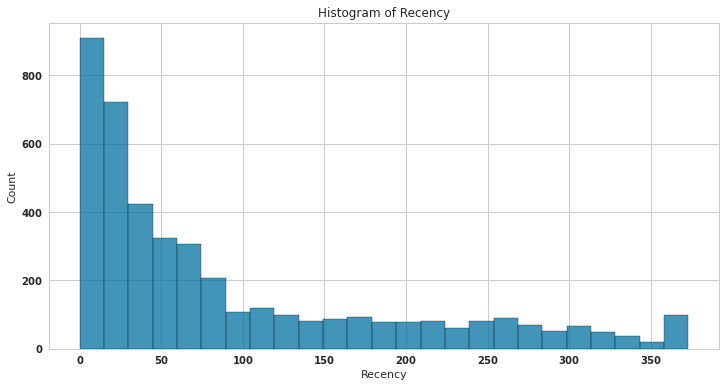

In [743]:
# Plotting the histogram of Recency

sns.histplot(rfm['Recency'])
plt.title('Histogram of Recency')
plt.show()

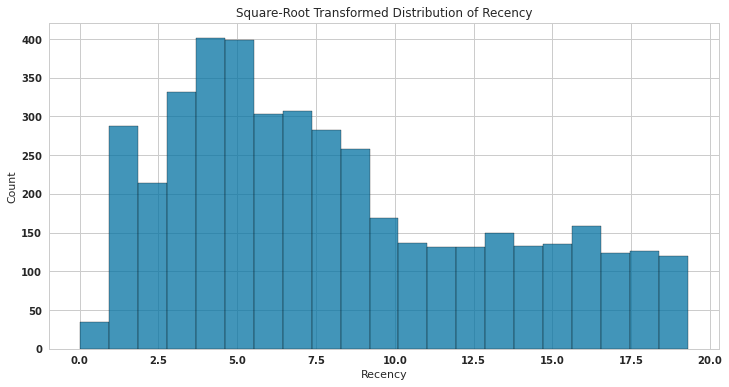

In [1058]:
# Plotting Recency with the square-root

sns.histplot(np.sqrt(rfm['Recency']))
plt.title('Square-Root Transformed Distribution of Recency')
plt.show()

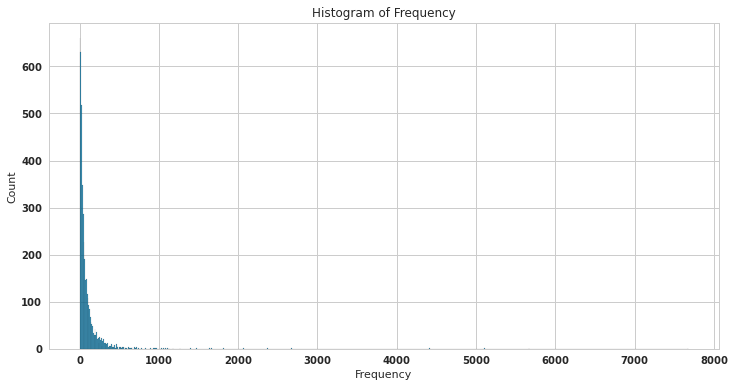

In [745]:
# Plotting histogram of Frequency

sns.histplot(rfm['Frequency'])
plt.title('Histogram of Frequency')
plt.show()

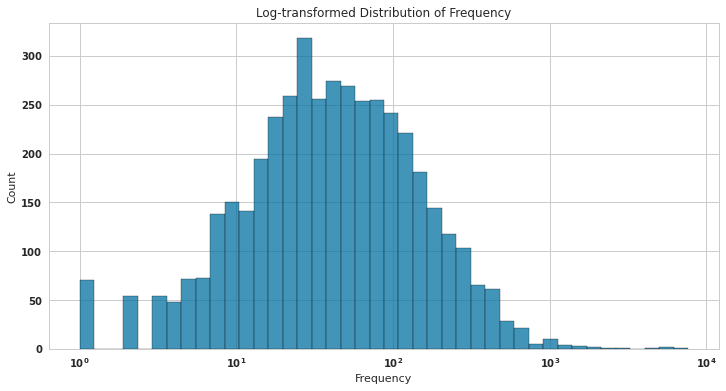

In [746]:
# Plotting the log of Frequency

sns.histplot(rfm['Frequency'], log_scale=True)
plt.title('Log-transformed Distribution of Frequency')
plt.show()

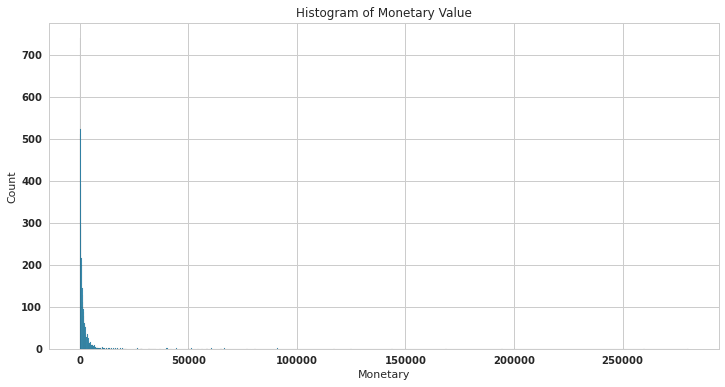

In [747]:
# Plotting histogram of monetary value

plt.title('Histogram of Monetary Value')
sns.histplot(rfm['Monetary'])
plt.show()

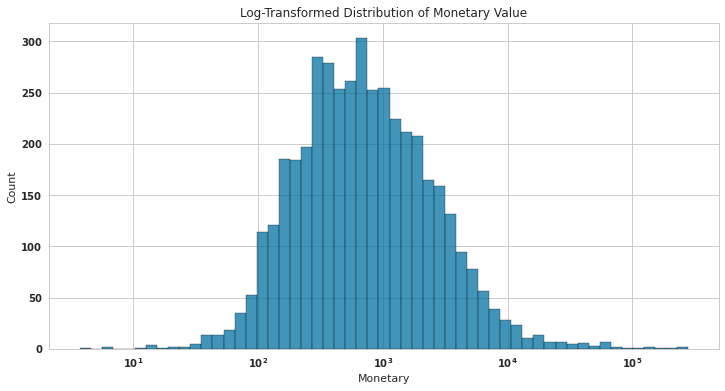

In [748]:
# Plotting log-transformed distribution of monetary value

plt.title('Log-Transformed Distribution of Monetary Value')
sns.histplot(rfm['Monetary'], log_scale=True)
plt.show()

The plots looked a bit skewed in their distributions so perhaps something should be done to change this. For example  we could transform the variables to look more like normal distributions. However, let's first compute the quartiles for the RFM features and the RFM score to have a closer look how the customers are segmented to different groups.

In [749]:
# Computing quartiles for RFM features

rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4', '3', '2', '1'])
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4,','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [750]:
# Creating the RFM Score column

rfm['RFM_score'] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) + rfm.M_quartile.astype(str)
rfm[rfm['RFM_score'] == '111'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
14646.0,1,2076,280206.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111
14911.0,1,5670,143711.17,1,1,1,111
14156.0,9,1395,117210.08,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111


We can see that that the most valuable customer based on the RFM score with the highest monetary values is from customer id '14646' who has made 2076 separate orders during the year with a total value of €280,206, and the last order was one day before the end of the timeframe. In fact the top 10 all share a similar pattern, but lets see what happens if we sort the values through the highest monetary values alone.

In [751]:
rfm.sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
14646.0,1,2076,280206.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111
16446.0,0,3,168472.50,1,4,1,141
14911.0,1,5670,143711.17,1,1,1,111
12415.0,24,714,124914.53,2,1,1,211
14156.0,9,1395,117210.08,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16029.0,38,241,80850.84,2,1,1,211


We can see that the first three customers on the list are the same, but after that we start noticing some differences. These customers should be important customers because they have made high value orders, but because they don't engage as frequently as some others, or there has been a long time since the last order, they end up in completely different segments even though one could argument that if you spend around €100,000 in one year, you should rather be in the top tier of customers than in the bottom, as in customer numer 12346 who is indicated in the 441 group with €77,183 worth of orders.

This happens because we penalize those customers who have joined recently and haven't been able yet to buy so frequently or who have made one or two big purchases in the past.

We could try to change this categorization by taking into account more the lifetime value of a customer. This could happen by a normalization of the RFM variables which takes into account the time a customer has been a member of the service. So let's try to create this by first creating a lifetime variable that calculates the time a customer has been a member of the service.

In [752]:
# Creating a customer lifetime value column

rfm['Lifetime'] = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: 1 if (PRESENT - date.min()).days == 0 else (PRESENT - date.min()).days})
rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score,Lifetime
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,325
12347.0,2,182,4310.00,1,1,1,111,367
12348.0,75,31,1797.24,3,3,1,331,358
12349.0,18,73,1757.55,2,2,1,221,18
12350.0,310,17,334.40,4,4,3,443,310


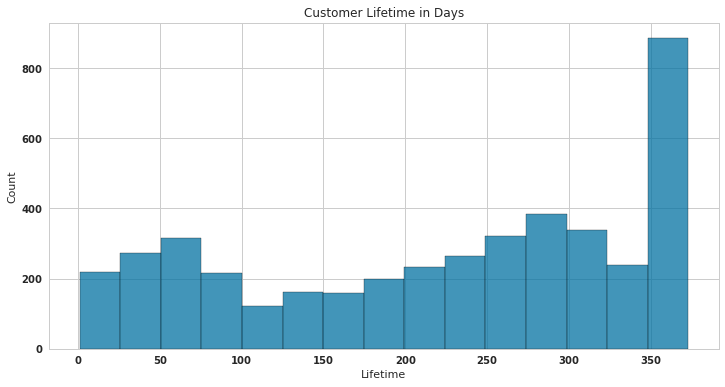

In [753]:
# Plotting customer lifetime 

sns.histplot(data=rfm, x='Lifetime', stat='count')
plt.title('Customer Lifetime in Days')
plt.show()

We can see from the plot, that most of the customers have made purchases right at the beginning of the timeframe and have a customer lifetime in days of 350 or more. This however, will skew the quartiles of frequency in favor of old customers compared to new ones as they've had more time to make orders. In order to encounter this, we will divide the frequency and monetary variables with the time they have been registered as customers (i.e. from the first purchase) and use a minmax sccaler for the recency variable.

In [795]:
# Creating normalized RFM variables

rfm['R_per_L'] = MinMaxScaler().fit_transform(np.array(rfm['Recency']).reshape(-1,1))
rfm['F_per_L'] = rfm['Frequency'] / rfm['Lifetime']
rfm['M_per_L'] = rfm['Monetary'] / rfm['Lifetime']

rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score,Lifetime,R_per_L,F_per_L,M_per_L,R_per_L_quartile,F_per_L_quartile,M_per_L_quartile,RFM_per_L_score
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,325,0.871314,0.003077,237.488000,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111,367,0.005362,0.495913,11.743869,1,2,1,121
12348.0,75,31,1797.24,3,3,1,331,358,0.201072,0.086592,5.020223,2,4,2,242
12349.0,18,73,1757.55,2,2,1,221,18,0.048257,4.055556,97.641667,4,1,1,411
12350.0,310,17,334.40,4,4,3,443,310,0.831099,0.054839,1.078710,4,4,4,444


Now that we normalized the RFM variables, we can also recalculate the quartiles.

In [797]:
# Computing quartiles for standardized RFM features

rfm['R_per_L_quartile'] = pd.qcut(rfm['R_per_L'], 4, [1, 2, 3, 4], duplicates='drop')
rfm['F_per_L_quartile'] = pd.qcut(rfm['F_per_L'], 4, [4, 3, 2, 1], duplicates='drop')
rfm['M_per_L_quartile'] = pd.qcut(rfm['M_per_L'], 4, [4, 3, 2, 1], duplicates='drop')

rfm.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score,Lifetime,R_per_L,F_per_L,M_per_L,R_per_L_quartile,F_per_L_quartile,M_per_L_quartile,RFM_per_L_score
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,325,0.871314,0.003077,237.488000,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111,367,0.005362,0.495913,11.743869,1,2,1,121
12348.0,75,31,1797.24,3,3,1,331,358,0.201072,0.086592,5.020223,3,4,2,242
12349.0,18,73,1757.55,2,2,1,221,18,0.048257,4.055556,97.641667,2,1,1,411
12350.0,310,17,334.40,4,4,3,443,310,0.831099,0.054839,1.078710,4,4,4,444


We can already notice some differences when comparing the quartiles. Lets see the value counts on each variable to get a quick comparison.

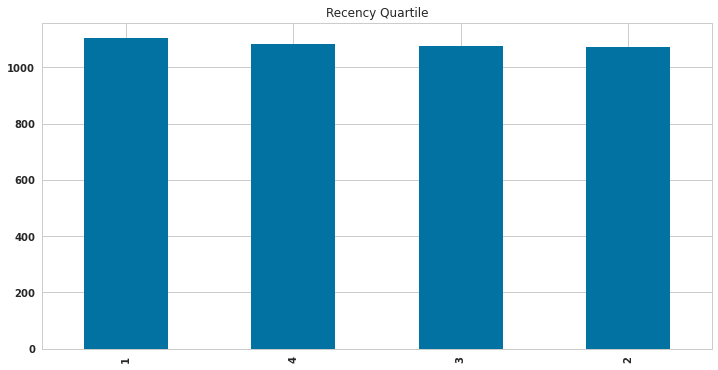

In [1007]:
# Plotting bar chart of Recency quartile

rfm['R_quartile'].value_counts().plot(kind='bar')
plt.title('Recency Quartile')
plt.show()

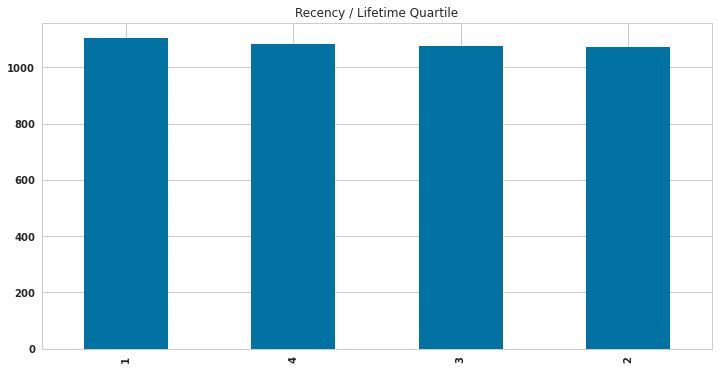

In [1008]:
# Plotting Recency per Lifetime quartile

rfm['R_per_L_quartile'].value_counts().plot(kind='bar')
plt.title('Recency / Lifetime Quartile')
plt.show()

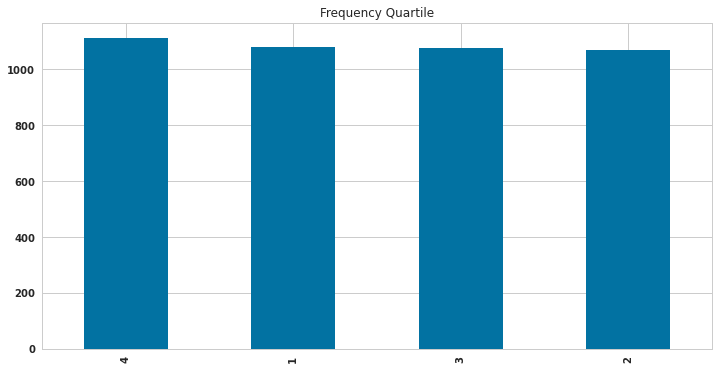

In [1009]:
# Plotting Frequency quartile

rfm['F_quartile'].value_counts().plot(kind='bar')
plt.title('Frequency Quartile')
plt.show()

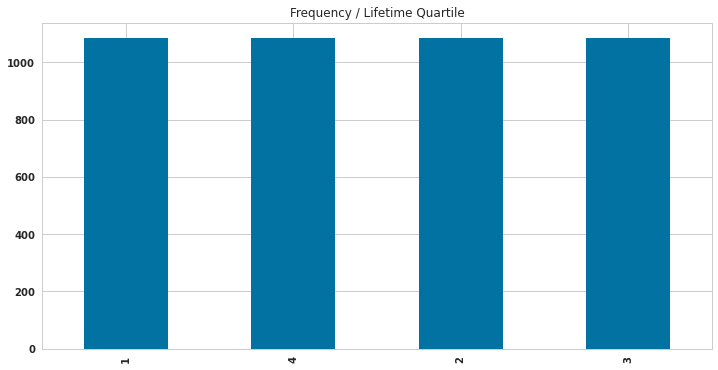

In [1010]:
# Plotting Frequency per Lifetime quartile

rfm['F_per_L_quartile'].value_counts().plot(kind='bar')
plt.title('Frequency / Lifetime Quartile')
plt.show()

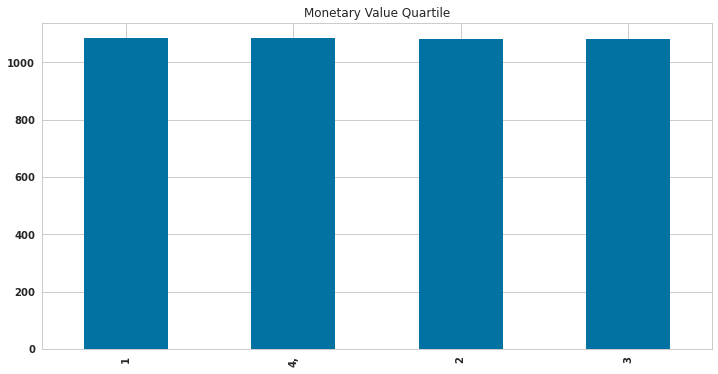

In [1011]:
# Plotting Monetary value quartile

rfm['M_quartile'].value_counts().plot(kind='bar')
plt.title('Monetary Value Quartile')
plt.show()

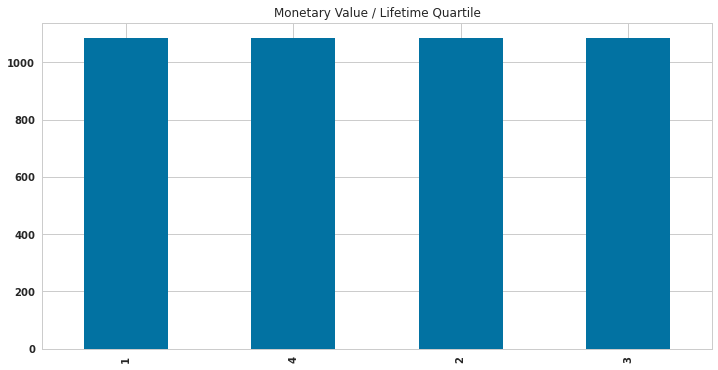

In [1060]:
# Plotting Monetary value per Lifetime quartile

rfm['M_per_L_quartile'].value_counts().plot(kind='bar')
plt.title('Monetary Value / Lifetime Quartile')
plt.show()

There is a slight difference in the plots, but if we look closely we can see that the frequency category is now more even. The monetary value quartile and the recency quartile stayed the same.

Finally, lets create the standardized version of the RFM score.

In [804]:
# Creating standardized RFM Score column

rfm['RFM_per_L_score'] = rfm.R_per_L_quartile.astype(str) + rfm.F_per_L_quartile.astype(str) + rfm.M_per_L_quartile.astype(str)
rfm[rfm['RFM_per_L_score'] == '111'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score,Lifetime,R_per_L,F_per_L,M_per_L,R_per_L_quartile,F_per_L_quartile,M_per_L_quartile,RFM_per_L_score
CustomerID,,,,,,,,,,,,,,,
14646.0,1,2076,280206.02,1,1,1,111,354,0.002681,5.864407,791.542429,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111,367,0.000000,1.174387,707.513079,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111,367,0.021448,0.915531,529.675177,1,1,1,111
14911.0,1,5670,143711.17,1,1,1,111,373,0.002681,15.201072,385.284638,1,1,1,111
14156.0,9,1395,117210.08,1,1,1,111,371,0.024129,3.760108,315.930135,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111,373,0.005362,2.581769,244.135067,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111,358,0.010724,0.773743,186.183128,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111,101,0.010724,50.603960,645.195941,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111,373,0.008043,1.522788,174.368954,1,1,1,111


The list looks the same as before. Let's now see how the two methods compare by showing the number of segments and the biggest segments that contain at least 100 customers.

In [805]:
len(rfm['RFM_score'].value_counts()), len(rfm['RFM_per_L_score'].value_counts())

(61, 60)

In [806]:
# Showing the RFM score segments that have at least 100 members

rfm['RFM_score'].value_counts()[:14]

111     442
444,    381
211     222
433     206
344,    181
322     168
222     166
333     161
122     147
233     129
244,    124
443     109
311     105
434,    101
Name: RFM_score, dtype: int64

In [854]:
# Showing the RFM normalized score segments that have at least 100 members

rfm['RFM_per_L_score'].value_counts()[:12]

444    602
111    462
211    245
333    230
222    206
322    201
122    152
233    140
434    135
344    127
433    124
212    107
Name: RFM_per_L_score, dtype: int64

We can see that the RFM analysis created 61 segments with 14 groups that had at least 100 customers while the normalized version created one less from the customer data and 12 groups of 100 customers

A closer look at the highest quantiles of the RFM score shows that in the first 10 groups we have two recency groups (111 and 122), three frequency groups (111, 211 and 311)  and  three monetary groups (111, 211 and 311).

The normalized version on the other hand, produced two recency groups (111, and 122), three frequency groups (111, 211, and 212) and two monetary value groups (111 and 211).

If we want to think the importance of the groups, we could categorize the best customers labeled with a score '111'. The customers that are most loyal and buy frequently are the four frequency groups that have '1' labeled as the score (111, 211, 212, and 311). The group which spends the most money, are the three monetary value groups that have a label '1' as the score (111, 211, and 311). Other important groups that should be noted are the customers who have spent a lot of money in a frequent manner, but haven't been ordering anything for some time (211 and 311). 

From this we can conclude that by normalizing the RFM variables, we managed to find a new customer group that can be added with the previous groups from the RFM analysis that have over 100 members. In total we have identified 5 groups (111, 122, 211, 212 and 311) with over 100 customers in each which represent the highest quartiles when comparing people by their purchase behavior based on recency, frequency and monetary value. We can add to this the lost customer group labeled 444 with its members as group which doesn't need to be contacted with.

Next we move on to create some additional variables.

In [328]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
total_sales           float64
dtype: object

<b> Product Groups </b>

The stock code or description would help to pinpoint the item that was sold. We could group the products into categories because there are over 3800 different items being sold which makes them difficult to analyze one-by-one. For this task, it would be easier to categorize the items from the descriptions rather than from the stock code (which we are not familiar with). For this, we can use Natural Language Processing (NLP) with the help of a stemmer to extract the words from the description, vectorize the words, and use a dimension reduction technique to help reduce the number of dimensions. The vector representation of the products will be in the form of a sparse matrix so we will need to use a Truncated version of the Singular Value Decomposition (SVD). Then we use the K-means algorithm to cluster the vectorized words into separate categories of products.

In [812]:
# Creating a list of all unique descriptions

clustering = df.copy()
products = clustering['Description'].unique()
print('There are {} unique products in the data set.'.format(len(products)))

There are 3877 unique products in the data set.


In [813]:
# Showing a few descriptions of products

clustering['Description'].sample(5)

362563    CHRISTMAS CRAFT LITTLE FRIENDS
321659      ANTIQUE SILVER T-LIGHT GLASS
441693               WALL ART KEEP CALM 
270547     SKULL LUNCH BOX WITH CUTLERY 
83590          DOORMAT RESPECTABLE HOUSE
Name: Description, dtype: object

In [814]:
# Setting up stemmer and vectorizer to extract and vectorize words

stemmer = nltk.stem.porter.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

def stem_clean(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', analyzer=stem_clean, min_df=0., max_df=0.3)

In [815]:
# Transforming words into vectors

vector_matrix = vectorizer.fit_transform(products)
vector_matrix.shape

(3877, 1697)

In [816]:
# Loading TruncatedSVD and fitting data into 100 components (for latent semantic analysis)

svd = TruncatedSVD(n_components=100)
svd_matrix = svd.fit_transform(vector_matrix)
svd_matrix.shape

(3877, 100)

In [817]:
# Checking min, max and mean of the matrix

svd_matrix.min(), svd_matrix.max(), svd_matrix.mean()

(-0.5598207855947, 0.847173243394386, 0.00214525871002847)

In [818]:
# Normalizing vector embeddings by extracting with the mean and dividing with the standard deviation

svd_matrix = Normalizer(copy=False).fit_transform(svd_matrix)
svd_matrix.shape

(3877, 100)

In [819]:
# Checking min, max and mean of the matrix

svd_matrix.min(), svd_matrix.max(), svd_matrix.mean()

(-0.6280056456190171, 0.8519338087156125, 0.0034584438174702858)

We will now implement the K-means algorithm with the `scikit-learn` library to find the different product groups from the sparse matrix. This library gives us several tools that will help with the implementation of the algorithm. For the initialization of the centroids, we will use the k-means++ initialization scheme that instead of a random initialization, puts the centroids at a distance from each other that should help us achieve better results. Finally, we will loop the algorithm to try an increasing number of clusters and we will plot the results with the Silhouette Score to see the right amount of clusters.

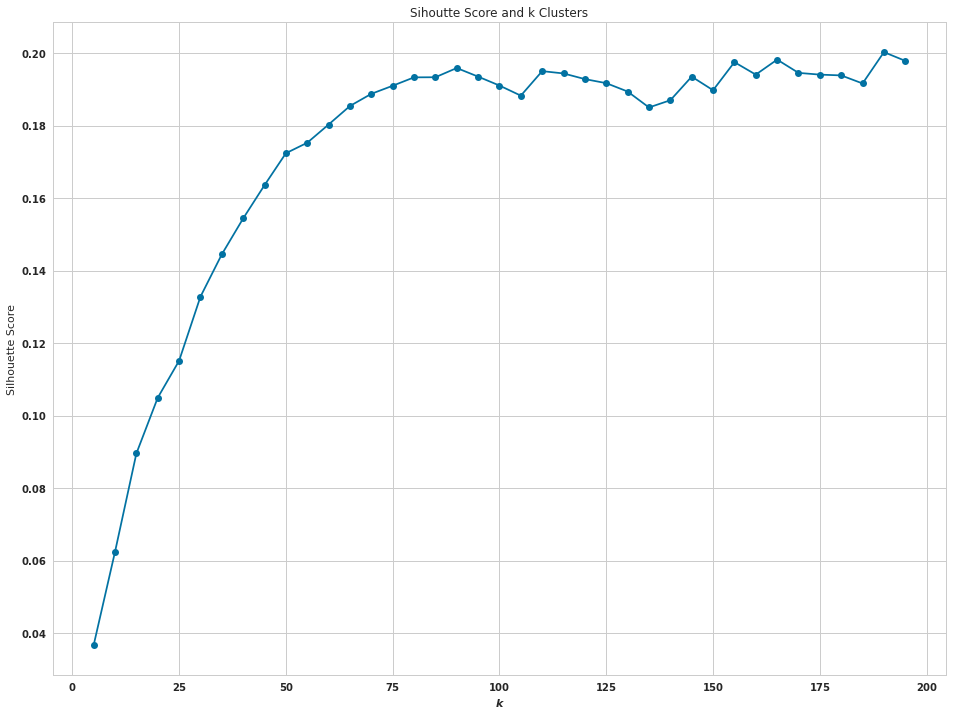

In [820]:
# Perfoming K-means clustering with silhouette score plotting

score = []

for n_clusters in range(5, 200, 5):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=44)
    kmeans.fit(svd_matrix)
    clusters = kmeans.predict(svd_matrix)
    s_score = silhouette_score(svd_matrix, clusters)
    score.append(s_score)

plt.figure(figsize=(16, 12))
plt.plot(range(5, 200, 5), score, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.title("Sihoutte Score and k Clusters")
plt.show()

We can see the highest peak is at 190 clusters which means the algorithm suggests there should be that number of product groups.

We can visualize the clusters with t-SNE which is the t-distributed stochastic neighbor embedding, a statistical technique for dimensionality reduction that is particularly well suited for the visualizing high-dimensional datasets. To do this, we will predict the clusters with the K-means algorithm using 190 clusters together with the t-SNE to reduce the dimensions of the vector embeddings that are in 100-dimensions into 2-dimensions.

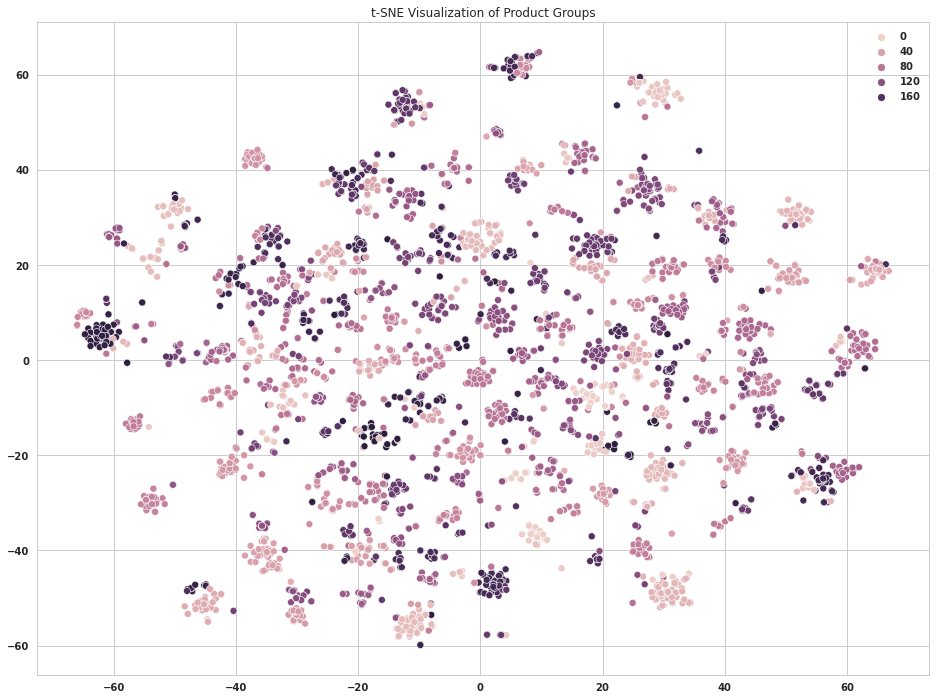

In [822]:
# Performing K-means clustering with t-SNE for visualizing product groups

kmeans = KMeans(init='k-means++', n_clusters=190, n_init=10, random_state=44)
preds = kmeans.fit_transform(svd_matrix)
clusters = kmeans.predict(svd_matrix)

tsne = TSNE(n_components=2, perplexity=40, random_state=44).fit_transform(svd_matrix)
plt.figure(figsize=(16, 12))
sns.scatterplot(tsne[:,0], tsne[:,1], hue=clusters)
plt.title('t-SNE Visualization of Product Groups')
plt.show()

We can see that the K-means managed to perform quite well. There are some points that haven't been groupped together in a cluster and some which have formed a mixed group, but most of the datapoints seemed to be clustered quite nicely into their separate groups. We can also see the histogram of the clusters.

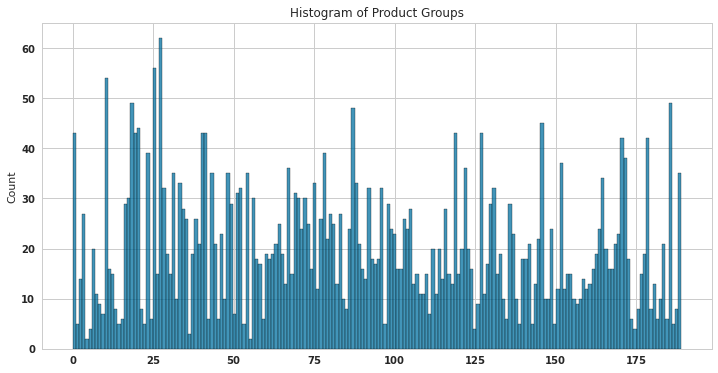

In [823]:
# Plotting histogram of the product groups

sns.histplot(clusters, bins=190)
plt.title('Histogram of Product Groups')
plt.show()

There are a few groups that contain a few products, but most of the groups seem to have more than 10. The results are good so we create a dictionary where we save the groups and the products together.

In [824]:
# Dictionary of products and their groups

dict_products = {item : cluster for item, cluster in zip(products, clusters)}

In [826]:
# Let's have a look inside one group of products

for key, value in dict_products.items():
    if value == 100:
        print(key)

JAZZ HEARTS PURSE NOTEBOOK
CHRYSANTHEMUM NOTEBOOK
SMALL RED BABUSHKA NOTEBOOK 
ROMANTIC IMAGES NOTEBOOK SET
CURIOUS  IMAGES NOTEBOOK SET
YELLOW SHARK HELICOPTER
SMALL PURPLE BABUSHKA NOTEBOOK 
SMALL YELLOW BABUSHKA NOTEBOOK 
LARGE PURPLE BABUSHKA NOTEBOOK  
LARGE YELLOW BABUSHKA NOTEBOOK 
LARGE RED BABUSHKA NOTEBOOK 
MADRAS NOTEBOOK LARGE 
VINTAGE NOTEBOOK PARIS DAYS
DAISY NOTEBOOK 
BUTTONS AND STRIPES NOTEBOOK 
VINTAGE NOTEBOOK BEAUTY GIRL
YELLOW DRAGONFLY HELICOPTER
BLOSSOM  IMAGES NOTEBOOK SET
VINTAGE NOTEBOOK TRAVELOGUE
MADRAS NOTEBOOK MEDIUM
ASSORTED MINI MADRAS NOTEBOOK
ASSORTED SANSKRIT MINI NOTEBOOK
Next Day Carriage


We can see that that the inside the group there are a few mistakes but overall the result looks quite good.

In [827]:
# Creating the product group variable

clustering['product_group'] = clustering['Description'].apply(lambda x: dict_products[x])
clustering.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,product_group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,167
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,56
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,51
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189


We can now make a closer comparison of the product group together with the stock code to see how closely they match and whether we could gain some additional information for our benefit.

In [828]:
clustering[clustering['product_group'] == 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,product_group
362,536401,20992,JAZZ HEARTS PURSE NOTEBOOK,9,2010-12-01 11:21:00,0.85,15862.0,United Kingdom,7.65,100
747,536446,20777,CHRYSANTHEMUM NOTEBOOK,2,2010-12-01 12:15:00,1.65,15983.0,United Kingdom,3.30,100
970,536520,22754,SMALL RED BABUSHKA NOTEBOOK,1,2010-12-01 12:43:00,0.85,14729.0,United Kingdom,0.85,100
1394,536539,85019A,ROMANTIC IMAGES NOTEBOOK SET,4,2010-12-01 14:03:00,4.25,15165.0,United Kingdom,17.00,100
1395,536539,85019C,CURIOUS IMAGES NOTEBOOK SET,3,2010-12-01 14:03:00,4.25,15165.0,United Kingdom,12.75,100
...,...,...,...,...,...,...,...,...,...,...
540127,581467,22753,SMALL YELLOW BABUSHKA NOTEBOOK,2,2011-12-08 19:24:00,0.21,13077.0,United Kingdom,0.42,100
540128,581467,22754,SMALL RED BABUSHKA NOTEBOOK,1,2011-12-08 19:24:00,0.21,13077.0,United Kingdom,0.21,100
541589,581514,22753,SMALL YELLOW BABUSHKA NOTEBOOK,12,2011-12-09 11:20:00,0.21,17754.0,United Kingdom,2.52,100
541590,581514,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,2011-12-09 11:20:00,0.21,17754.0,United Kingdom,2.52,100


We can now see that the product group looks quite good compared to all the different stockcodes which seem to indicate at the same kind of items with completely different codes. Next we move on by mapping the countries and the invoice dates.

In [833]:
# Mapping invoice date

clustering['Month'] = clustering['InvoiceDate'].map(lambda x: x.month)
clustering['Week'] = clustering['InvoiceDate'].map(lambda x: x.week)
clustering['Weekday'] = clustering['InvoiceDate'].map(lambda x: x.weekday())
clustering['Day'] = clustering['InvoiceDate'].map(lambda x: x.day)
clustering['Hour'] = clustering['InvoiceDate'].map(lambda x: x.hour)
clustering.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,product_group,Month,Week,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,167,12,48,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189,12,48,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,56,12,48,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,51,12,48,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189,12,48,2,1,8


In [834]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      392451 non-null  object        
 1   StockCode      392451 non-null  object        
 2   Description    392451 non-null  object        
 3   Quantity       392451 non-null  int64         
 4   InvoiceDate    392451 non-null  datetime64[ns]
 5   UnitPrice      392451 non-null  float64       
 6   CustomerID     392451 non-null  float64       
 7   Country        392451 non-null  object        
 8   total_sales    392451 non-null  float64       
 9   product_group  392451 non-null  int64         
 10  Month          392451 non-null  int64         
 11  Week           392451 non-null  int64         
 12  Weekday        392451 non-null  int64         
 13  Day            392451 non-null  int64         
 14  Hour           392451 non-null  int64         
dtype

The variables look all set, so lets join the two tables together.

In [835]:
# joining tables

customers = clustering.join(rfm, on='CustomerID')

In [836]:
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,product_group,Month,Week,Weekday,Day,Hour,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score,Lifetime,R_per_L,F_per_L,M_per_L,R_per_L_quartile,F_per_L_quartile,M_per_L_quartile,RFM_per_L_score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,167,12,48,2,1,8,372,297,5391.21,4,1,1,411,373,0.997319,0.796247,14.453646,4,1,1,411
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189,12,48,2,1,8,372,297,5391.21,4,1,1,411,373,0.997319,0.796247,14.453646,4,1,1,411
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,56,12,48,2,1,8,372,297,5391.21,4,1,1,411,373,0.997319,0.796247,14.453646,4,1,1,411
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,51,12,48,2,1,8,372,297,5391.21,4,1,1,411,373,0.997319,0.796247,14.453646,4,1,1,411
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,189,12,48,2,1,8,372,297,5391.21,4,1,1,411,373,0.997319,0.796247,14.453646,4,1,1,411


In [838]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392451 entries, 0 to 541908
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392451 non-null  object        
 1   StockCode         392451 non-null  object        
 2   Description       392451 non-null  object        
 3   Quantity          392451 non-null  int64         
 4   InvoiceDate       392451 non-null  datetime64[ns]
 5   UnitPrice         392451 non-null  float64       
 6   CustomerID        392451 non-null  float64       
 7   Country           392451 non-null  object        
 8   total_sales       392451 non-null  float64       
 9   product_group     392451 non-null  int64         
 10  Month             392451 non-null  int64         
 11  Week              392451 non-null  int64         
 12  Weekday           392451 non-null  int64         
 13  Day               392451 non-null  int64         
 14  Hour

# 5. Customer Segmentation Analysis

In the exploratory analysis we found that the eCommerce platform had sold for around €8.88M worth of goods that consisted of 3665 different products for 4338 unique customers. Moreover, these customers came from all around the word, the majority concentrated in Europe, and especially in the UK, but there were also some customers, especially in Japan and Singapore that seemed to make valuable purchases.

We first used the RFM analysis to segment the customers into groups based on how often people were making orders, the value of those orders and how recently they have made those orders. Based on this analysis, we can make a distinction on the customers based on which quartile they fit by making a comparison between all customers, and then ranking the customers from 1 being the highest to 4 being the lowest. By combining these three measures we get the RFM score.

The RFM score however doesn't take into account the lifetime value of a customer. As we are concerned with the quartiles, this skews the distribution in the favor of older customers who have accumulated more orders than the newer ones. In order to account for this, we created a normalized version of the RFM variables that takes into account the lifetime value of each customer, and by scaling the recency variable with the minmax-scaler. This normalized version introduced a new  segment that had over 100 customers on top of the other previously found segments

With the RFM score we got the customers grouped in 61 different customer segments and with the normalized version, into 60 customer segments. Moreover, in the first customer segments, 14 had at least 100 customers in them (covering 60 % of all the customers), and in the second 12 (covering 63 % of all the customers). Then we created a normalized verison of the RFM variables by taking into account the lifetime value of each customer and by scaling the recency variable with the minmax-scaler. In total, we identified one third of all the customers (1500/4338), whereas the rest fall into the smaller segments. 

Let's now analyze more closely the 5 customer groups. We first check again the number of customers in each customer segment and what products they have been ordering.

In [1021]:
rfm['RFM_score'].value_counts()[:14]

111     442
444,    381
211     222
433     206
344,    181
322     168
222     166
333     161
122     147
233     129
244,    124
443     109
311     105
434,    101
Name: RFM_score, dtype: int64

In [852]:
rfm['RFM_per_L_score'].value_counts()[:12]

444    602
111    462
211    245
333    230
222    206
322    201
122    152
233    140
434    135
344    127
433    124
212    107
Name: RFM_per_L_score, dtype: int64

In [840]:
# Ordered product groups by the best group

print("There were {} product groups ordered by group 111".format(customers[customers['RFM_score'] == '111']['product_group'].nunique()))

There were 190 product groups ordered by group 111


In [1061]:
# Ordered product groups by the potential customers 

print("There were {} product groups ordered by group 122".format(customers[customers['RFM_score'] == '122']['product_group'].nunique()))

There were 179 product groups ordered by group 122


In [845]:
# Ordered product groups by the loyal customers

print("There were {} product groups ordered by group 212".format(customers[customers['RFM_score'] == '212']['product_group'].nunique()))

There were 187 product groups ordered by group 212


In [843]:
# Ordered product groups by the old good customers

print("There were {} product groups ordered by group 211".format(customers[customers['RFM_score'] == '211']['product_group'].nunique()))
print("There were {} product groups ordered by group 311".format(customers[customers['RFM_score'] == '311']['product_group'].nunique()))

There were 187 product groups ordered by group 211
There were 184 product groups ordered by group 311


<b> Customer Segments </b>

    - Most Iportant Customers - (111) - This group consists of around 450 customers that order frequently by making high value orders from all the 170 product groups. This group should be kept notified of all the new high value product offers. 
    
    - Potential Customers - (122) - This group has around 150 members  that have made their orders recently. This group also tends to buy from a wide range of products as they have ordered products from most of the product categories. So perhaps this group could be reminded of the opportunity to shop at the platform with some reduced price offers and when new products arise.
    
    - Loyal Customers - (212) - This group with around 110 customers buy frequently and are loyal to the platform. They have bought from almost all of the product groups and spend a decent amount of value in their orders, but haven't been ordering lately so perhaps these customers could be notified of some added benefits, new products or reduction in prices from their next order in order to get them even more engaged.
    
    - Old Good Customers - (211 and 311) - This group has over 300 customers that have been ordering frequently and making orders of high value, but not recently. This group has ordered from most of the product categories so they could be shown some new products that are entering the store.
    
    - Lost Customers - (444) - This group has 400 to 600 members depending on how you measure them and these customers have made a few low value orders a long time ago. There is no need to re-engage with this group of customers any further.

<b> Best Customer Segment </b>

We can have a closer look at the customers of the different customer segments with pivot tables and introducing different statistics for the three measures. Here we see all the best customer groups that order frequently by placing high valued orders.

In [896]:
customers.pivot_table(index=['RFM_score'], values=['Recency', 'Frequency', 'Monetary'], aggfunc={
    'Recency': [min, np.median, max, np.std],
    'Frequency': [min, np.median, max, np.std],
    'Monetary': [min, np.median, max, np.std],
})[:3]

Frequency                             Monetary                    \
                max median   min          std        max   median      min   
RFM_score                                                                    
111          7676.0  463.0  99.0  1992.647116  280206.02  6484.54  1661.44   
112           545.0  195.0  99.0   102.061419    1660.88  1228.88   674.82   
113           201.0  136.0  99.0    30.663713     664.34   594.52   316.25   

                        Recency                        
                    std     max median  min       std  
RFM_score                                              
111        44821.702806    17.0    4.0  0.0  4.983146  
112          300.504987    17.0    8.0  0.0  4.880624  
113          109.134419    17.0    7.0  1.0  5.349920

We can see that the most important customers differ  compared to the other best customer segments, but there seems to be some difference inside the most import customer segment as well. While the minimum value of orders in the most important customers is around €1660, the maximum is €280,206 with a median of around €4065. The same could be said on the frequency of the orders, ranging from 7676 orders made by one particular customer to a minimum of 99 orders, and the median being 234.

Let's check the total sales in each of these customer segments

In [901]:
# Total sales in the best customer segments

print('Total sales in the 111 customer segment is: €%0.2f' % (customers[customers['RFM_score'] == '111']['total_sales'].sum()))
print('Total sales in the 112 customer segment is: €%0.2f' % (customers[customers['RFM_score'] == '112']['total_sales'].sum()))
print('Total sales in the 113 customer segment is: €%0.2f' % (customers[customers['RFM_score'] == '113']['total_sales'].sum()))

Total sales in the 111 customer segment is: €4159516.82
Total sales in the 112 customer segment is: €103454.85
Total sales in the 113 customer segment is: €7586.69


As we can see, there is also a big difference in the total sales generated by the best customer segments. The most important customers have bought products worth €4.16M which makes almost half of all the goods that have been sold.

We can also have a closer look at the top 20 of the most valuable customers in the '111' customer segment and how long they have been customers.

In [1055]:
rfm_segments = rfm[['Recency','Frequency','Monetary','RFM_score','Lifetime']]
rfm_segments[rfm_segments['RFM_score'] =='111'].sort_values('Monetary', ascending=False).head(20)

,Recency,Frequency,Monetary,RFM_score,Lifetime
CustomerID,,,,,
14646.0,1,2076,280206.02,111,354
18102.0,0,431,259657.30,111,367
17450.0,8,336,194390.79,111,367
14911.0,1,5670,143711.17,111,373
14156.0,9,1395,117210.08,111,371
17511.0,2,963,91062.38,111,373
16684.0,4,277,66653.56,111,358
14096.0,4,5111,65164.79,111,101
13694.0,3,568,65039.62,111,373


Most of the customers have been ordering products right from the beginning and are ordering still frequently which can be seen from the RFM score. All of them have ordered products worth at least €30,000. 

In total this group has made orders worth of €1.8M which is one fifth of the total sales of €8.88M.

<b> Market Segments </b>

Let's check next where the best customers come from.

In [857]:
# Checking countries of the best customer group

customers[customers['RFM_score'] == '111']['Country'].unique()

array(['France', 'United Kingdom', 'Germany', 'Norway', 'EIRE', 'Iceland',
       'Portugal', 'Sweden', 'Belgium', 'Netherlands', 'Australia',
       'Switzerland', 'Spain'], dtype=object)

The best customers come from European big countries such as France, United Kingdom, Germany and Spain, and rich smaller countries such as Norway, Iceland, Sweden and Switzerland. One country comes from outside Europe, Australia, and other European countries such as Ireland, Portugal and Belgium also make it to the list. One big market, Italy, seems to be missing from the list. Perhaps this could be one market segment which should be given more marketing effort towards to. Let's have a closer look at the Italian customers, as well as Japan and Singapore which we pinpointed earlier.

In [1028]:
# Checking the number of customers in Italy

customers[customers['Country'] == 'Italy']['CustomerID'].nunique()

14

In [1015]:
# Checking total sales from Italy

print('Total sales in Italy: €%0.2f' % customers[customers['Country'] == 'Italy']['total_sales'].sum())

Total sales in Italy: €17483.24


These 14 customers with a total value of €17,483 which clearly shows that there is clearly potential for reaching out more Italian customers and getting high-value orders of products from this big potential market. Next we check Japan and Singapore.

In [1038]:
# Checking number of customers from Japan

print('Total number of unique customers in Japan: {}'.format(customers[customers['Country'] == 'Japan']['CustomerID'].nunique()))

Total number of unique customers in Japan: 8


In [1018]:
# Checking total sales from Japan

print('Total sales in Japan: €%0.2f' % customers[customers['Country'] == 'Japan']['total_sales'].sum())

Total sales in Japan: €37416.37


In [1039]:
# Checking number of customer from Singapore

('Total number of unique customers in Singapore: {}'.format(customers[customers['Country'] == 'Singapore']['CustomerID'].nunique()))

'Total number of unique customers in Singapore: 1'

In [1019]:
# Checking total sales from Singapore

print('Total sales in Singapore: €%0.2f' % customers[customers['Country'] == 'Singapore']['total_sales'].sum())

Total sales in Singapore: €21279.29


We notice a similar pattern arising. In both of these countries, there is only a few customers who have ordered very high-value products , Japan and Singapore should be the markets were more effort should be pointed towards to. The total sales in Japan were €37,416 and €21,279 in Singapore, but as both are huge markets, there should be plenty of potential for extra sales.

<b> Time of Orders </b>

Lets now analyze the time of the year when the orders start to occur more frequently.

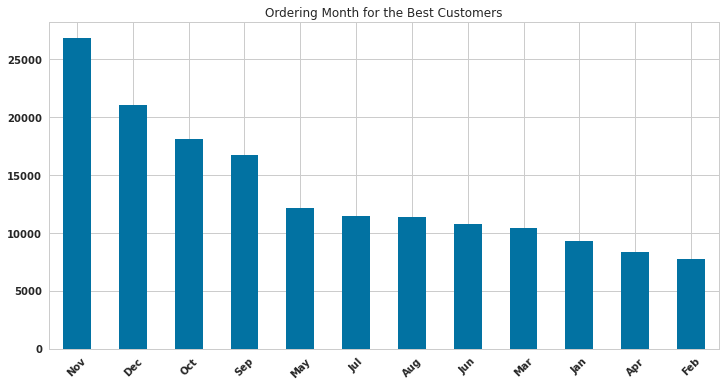

In [963]:
# Plotting bar chart of the ordering months for best customers

months = {'1':'Nov','2':'Dec','3':'Oct','4':'Sep','5':'May','6':'Jul','7':'Aug','8':'Jun','9':'Mar','10':'Jan','11':'Apr','12':'Feb'}
customers[customers['RFM_score'] =='111']['Month'].value_counts().plot(kind='bar')
plt.title('Ordering Month for the Best Customers')
plt.xticks(ticks = range(0,12,1), labels=months.values(), rotation=45)
plt.show()

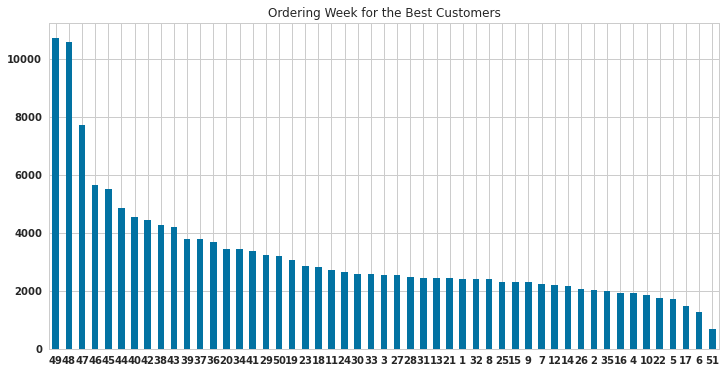

In [967]:
# Plotting bar chart of the ordering week for the best customers

customers[customers['RFM_score'] =='111']['Week'].value_counts().plot(kind='bar')
plt.title('Ordering Week for the Best Customers')
plt.xticks(rotation=360)
plt.show()

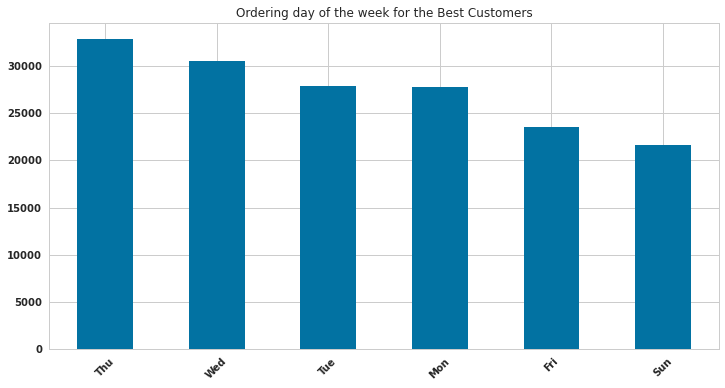

In [980]:
# Plotting bar chart of the ordering day of the week for the best customers

customers[customers['RFM_score'] =='111']['Weekday'].value_counts().plot(kind='bar')
plt.title('Ordering day of the week for the Best Customers')
plt.xticks(ticks = range(0,6,1), labels=['Thu','Wed','Tue','Mon','Fri','Sun'], rotation=45)
plt.show()

From the plots we can see that the majority of the orders concentrate at the end of the year in November and December where we reach over 20,000 orders a month, but we can see a rise in the orders already after summer, starting from September onwards where we see a rise of orders from the previous three months of summer of around 10,000 per month to over 15,000 per month. The quitest month of the year is also the shortest month, February.

Looking at the particular weeks, we can see a rising of orders starting from week 44 all the way to week 49. This is clearly the most busy time of the year, when all warehouse stocks of products should be full. At the end of the year there is a calming down of orders from week 50 onwards. The pace starts to increase again at week 18 when we enter May before the summer months of June, July and August.

When we turn our attenion towards the day of the week, we can see that the middle of the week, Wednesday and Thursday in particular, are the best days to launch new products as in these days we have most of the orders during the year, with over 30,000 orders each day. The quitest day is Sunday with a bit over 20,000 orders and there were no orders registered for Saturday. In fact, there are no orders in any of the Saturdays of the year which we can see from below.

In [984]:
# Showing total sales from Saturday during the whole year

customers[customers['Weekday'] == 5]['total_sales'].sum()

0.0

<b> Product Segment Analysis </b>

We can also see what kind of products the best customers order. First we check the top 10 product groups and then go through what's inside the top 3 groups.

In [985]:
# Showing the top 10 product groups from the best customers orders

customers[customers['RFM_score'] == '111']['product_group'].value_counts().sort_values(ascending=False)[:10]

146    6309
69     5858
186    4315
123    3715
27     3517
51     3364
20     2637
23     2554
41     2485
48     2331
Name: product_group, dtype: int64

In [859]:
# Checking products in the largest group category from the best customers

for key, value in dict_products.items():
    if value == 146:
        print(key)

LUNCH BAG RED RETROSPOT
JUMBO BAG RED RETROSPOT
RED RETROSPOT UMBRELLA
SET/20 RED RETROSPOT PAPER NAPKINS 
HAND WARMER RED RETROSPOT
RED RETROSPOT MUG
SET/5 RED RETROSPOT LID GLASS BOWLS
DOORMAT RED RETROSPOT
RED RETROSPOT PLATE 
RED RETROSPOT TAPE
RED RETROSPOT MINI CASES
BIRD DECORATION RED RETROSPOT
RED RETROSPOT OVEN GLOVE 
RETROSPOT RED WASHING UP GLOVES
RED RETROSPOT OVEN GLOVE DOUBLE
RED RETROSPOT WRAP 
RED RETROSPOT TISSUE BOX
RED RETROSPOT CAKE STAND
RED RETROSPOT CUP
RED RETROSPOT CHILDRENS UMBRELLA
RED RETROSPOT APRON 
RED RETROSPOT ROUND CAKE TINS
RED RETROSPOT BOWL
RED RETROSPOT PUDDING BOWL
RED RETROSPOT TRADITIONAL TEAPOT 
RED RETROSPOT PEG BAG
RED RETROSPOT CHARLOTTE BAG
RED RETROSPOT SHOPPER BAG
RED RETROSPOT BUTTER DISH
RED RETROSPOT PURSE 
RED RETROSPOT SUGAR JAM BOWL
RED RETROSPOT SHOPPING BAG
RED RETROSPOT WASHBAG
RED RETROSPOT TEA CUP AND SAUCER 
RED RETROSPOT LUGGAGE TAG
RED RETROSPOT PICNIC BAG
TEA BAG PLATE RED RETROSPOT
FRYING PAN RED RETROSPOT
RED RETROSPOT S

In [997]:
print('Total sales in largest product group is: €%0.2f' % customers[customers['product_group'] == 146]['total_sales'].sum())

Total sales in largest product group is: €339682.46


In [861]:
# Checking products in the second largest group category of the best customers

for key, value in dict_products.items():
    if value == 69:
        print(key)

JUMBO BAG PINK POLKADOT
JUMBO  BAG BAROQUE BLACK WHITE
JUMBO BAG CHARLIE AND LOLA TOYS
STRAWBERRY CHARLOTTE BAG
JUMBO STORAGE BAG SUKI
BAG 500g SWIRLY MARBLES
JUMBO BAG OWLS
JUMBO BAG STRAWBERRY
STRAWBERRY SHOPPER BAG
REX CASH+CARRY JUMBO SHOPPER
SAVE THE PLANET COTTON TOTE BAG
JUMBO STORAGE BAG SKULLS
JUMBO BAG WOODLAND ANIMALS
LETS GO SHOPPING COTTON TOTE BAG
DOCTOR'S BAG SOFT TOY
JUMBO BAG TOYS 
SUKI  SHOULDER BAG
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
WOODLAND CHARLOTTE BAG
NURSE'S BAG SOFT TOY
STRAWBERRY   PICNIC BAG
POSY CANDY BAG
JUMBO BAG ALPHABET
JUMBO BAG APPLES
JUMBO BAG PEARS
JUMBO BAG DOILEY PATTERNS
JUMBO BAG VINTAGE LEAF
JUMBO BAG VINTAGE CHRISTMAS 
JUMBO BAG 50'S CHRISTMAS 
JUMBO BAG VINTAGE DOILEY 


In [996]:
print('Total sales in second largest product group is: €%0.2f' % customers[customers['product_group'] == 69]['total_sales'].sum())

Total sales in second largest product group is: €333961.38


In [987]:
# Checking products in the third largest group category of the best customers

for key, value in dict_products.items():
    if value == 186:
        print(key)

AIRLINE LOUNGE,METAL SIGN
YOU'RE CONFUSING ME METAL SIGN 
COOK WITH WINE METAL SIGN 
GIN + TONIC DIET METAL SIGN
LADIES & GENTLEMEN METAL SIGN
METAL SIGN HER DINNER IS SERVED 
BATHROOM METAL SIGN
KITCHEN METAL SIGN
TOILET METAL SIGN
METAL SIGN TAKE IT OR LEAVE IT 
I'M ON HOLIDAY METAL SIGN
METAL SIGN EMPIRE TEA
WASHROOM METAL SIGN
VICTORIAN  METAL POSTCARD SPRING
NO JUNK MAIL METAL SIGN
NO SINGING METAL SIGN
CARDHOLDER HOLLY WREATH METAL
PLEASE ONE PERSON METAL SIGN
PARTY METAL SIGN 
AREA PATROLLED METAL SIGN
GARDEN METAL SIGN 
LAUNDRY 15C METAL SIGN
FANNY'S REST STOPMETAL SIGN
CHOCOLATE THIS WAY METAL SIGN
HOT BATHS METAL SIGN
POTTERING IN THE SHED METAL SIGN
MORE BUTTER METAL SIGN 
METAL SIGN HIS DINNER IS SERVED
BEWARE OF THE CAT METAL SIGN 
WAKE UP COCKEREL CALENDAR SIGN 
METAL SIGN NEIGHBOURHOOD WITCH 
METAL SIGN,CUPCAKE SINGLE HOOK
MAN FLU METAL SIGN
HOUSE WRECKING METAL SIGN 
WAY OUT METAL SIGN 
BATHROOM METAL SIGN 
METAL TUBE CHIME ON BAMBOO
OLD DOC RUSSEL METAL SIGN
METAL SIGN

In [993]:
print('Total sales of the third most sold products is: €%0.2f' % customers[customers['product_group'] == 186]['total_sales'].sum())

Total sales of the third most sold products is: €210576.85


In [988]:
# Checking products in the fourth largest group category of the best customers 

for key, value in dict_products.items():
    if value == 123:
        print(key)

LUNCH BAG SPACEBOY DESIGN 
LUNCH BAG WOODLAND
LUNCH BAG SUKI  DESIGN 
CHARLOTTE BAG SUKI DESIGN
LOLITA  DESIGN  COTTON TOTE BAG
ALPHABET STENCIL CRAFT
PEG BAG APPLES DESIGN
JUMBO BAG SPACEBOY DESIGN
WOODLAND DESIGN  COTTON TOTE BAG
SKULLS  DESIGN  COTTON TOTE BAG
RABBIT  DESIGN  COTTON TOTE BAG
PEG BAG APPLE DESIGN
LUNCH BAG RED SPOTTY
LUNCH BAG SUKI DESIGN 
LUNCH BAG ALPHABET DESIGN
LUNCH BAG APPLE DESIGN
CHARLOTTE BAG APPLES DESIGN
CHARLOTTE BAG ALPHABET  DESIGN
LUNCH BAG VINTAGE LEAF DESIGN
LUNCH BAG DOILEY PATTERN 


In [994]:
print('Total sales in the fourth largest product group is: €%0.2f' % customers[customers['product_group'] == 123]['total_sales'].sum())

Total sales in the fourth largest product group is: €136923.23


In [990]:
# Checking products in the fift largest group category of the best customers 

for key, value in dict_products.items():
    if value == 27:
        print(key)

SET OF 6 FUNKY BEAKERS
SET OF 3 COLOURED  FLYING DUCKS
SET OF 3 GOLD FLYING DUCKS
SET OF 6 SOLDIER SKITTLES
SET OF 3 BLACK FLYING DUCKS
SET OF 9 HEART SHAPED BALLOONS
SET OF 6 GIRLS CELEBRATION CANDLES
SET OF 3 HEART COOKIE CUTTERS
SET OF 20 KIDS COOKIE CUTTERS
ROUND SNACK BOXES SET OF 4 FRUITS 
SET OF 3 NOTEBOOKS IN PARCEL
SET OF 20 VINTAGE CHRISTMAS NAPKINS
SET OF 4 NAPKIN CHARMS LEAVES   
SET OF 4 NAPKIN CHARMS STARS   
SET OF 4 NAPKIN CHARMS CUTLERY
SET OF 2 CHRISTMAS DECOUPAGE CANDLE
SET OF 6 KASHMIR FOLKART BAUBLES
SET OF 4 NAPKIN CHARMS HEARTS
SET OF 4 NAPKIN CHARMS 3 KEYS 
SET OF 4 NAPKIN CHARMS INSTRUMENT
SET OF 4 NAPKIN CHARMS CROWNS 
GROW YOUR OWN FLOWERS SET OF 3
SET OF 6 3D KIT CARDS FOR KIDS
SET OF 6 STRAWBERRY CHOPSTICKS
GROW YOUR OWN HERBS SET OF 3
SET OF SALT AND PEPPER TOADSTOOLS
SET OF 6 HEART CHOPSTICKS
BASKET OF TOADSTOOLS
SET OF 6 VINTAGE NOTELETS KIT
SET OF 12  VINTAGE POSTCARD SET
ROUND CONTAINER SET OF 5 RETROSPOT
SET OF 3 CONEY ISLAND OVAL BOXES
SET OF 6 RIBBO

In [1041]:
print('Total sales in the fift largest product group is: €%0.2f' % customers[customers['product_group'] == 27]['total_sales'].sum())

Total sales in the fift largest product group is: €158889.44


In [1050]:

print('Total sales in the sixt largest product groups is: €%0.2f' %customers[customers['product_group'] == 51]['total_sales'].sum())
print('Total sales in the seventh largest product group is: €%0.2f' %customers[customers['product_group'] == 20]['total_sales'].sum())
print('Total sales in the eight largest product group is: €%0.2f' %customers[customers['product_group'] == 23]['total_sales'].sum())
print('Total sales in the ninth largest product group is €%0.2f' %customers[customers['product_group'] == 41]['total_sales'].sum())
print('Total sales in the tenth largest product group is €%0.2f' %customers[customers['product_group'] == 48]['total_sales'].sum())

Total sales in the sixt largest product groups is: €203071.04
Total sales in the seventh largest product group is: €76709.50
Total sales in the eight largest product group is: €105807.69
Total sales in the ninth largest product group is €167704.28
Total sales in the tenth largest product group is €114960.07


We can conclude that the five largest product groups consisted of:

    - Different kinds of retrospot labeled products, with a total sales of €339,682,
    
    - Different kinds of bags, espcecially jumbo sized, with a total sales of €333,961,
    
    - Different kinds of metal signs, with a total sales of €210,576,
    
    - Different kinds of designer bags, with a total sales of €136,923,
    
    - Different kinds of sets and bundles of products, with a total sales of €158,889.

In total these goods have a total value of €1.180M which makes around 13 % of all product sales and the 10 largest product groups make a total of around €1.85M.

# 6. Drawing Conclusions

In the beginning we had two different questions that needed to be answered. First, we wanted to know better our customers in order to increase customer satisfaction in meeting their expectations and increasing sales, and second, we wanted to know better beforehand what kind of goods our customers are buying from us in order to become more cost-efficient by decreasing the costs of logistics and warehousing, and also in meeting our customers expectation in order to increase customer satisfaction with quick deliviers of quality products.

With the help of the RFM analysis and the normalized version this analysis where we took into account also the customer lifetime value in the calculations, we managed to form 5 customer segments that all had distinct features, making a third of all the customers. These groups consisted of:

- Most Important Customers - This group should be kept notified of all the new high value product offers and overall be responsive in their enquiries and as proactive and informative as possible, as the group generated of around half of all the profits (€4.4M). The top 20 customers of this group generated 20% of all the total sales in the site so these are the customers that should be given extra effort.


- Potential Customers - This group has a lot of potential so this group could be reminded of the opportunity to shop at the platform with some reduced price offers and when new exciting products starts to arise. The big markets such as Italy, Japan and Singapore had only a few customers, but those customers made very high-valued orders compared to the customers from other countries. These three markets should be the ones where most the marketing effort towards acquiring new customers should be aimed for.


- Loyal Customers - These customers have bought from almost all of the product groups and spend a decent amount of value in their orders, but haven't been ordering lately so perhaps these customers could be notified of some added benefits, new products or reduction in prices from their next order in order to get them even more engaged. The perfect day of the week for introducing new products would be in the middle of the week, Wednesday or Thursday preferably, as in these days most of the orders take place.


- Old Good Customers - These customers have been ordering frequently and making orders of high value, but not recently. These customers should be given incentives that attract their attention back to the products of the platform so they could be shown some new products that are entering the store or by giving some price reductions on the older products that are similar to the ones they have ordered in the past.


- Lost Customers - These customers have made a few low value orders a long time ago and there is no need to re-engage with this group of customers any further.

For the second question, we wanted to know what kind of products are being ordered and when. By segmenting the product into different groups with the K-means algorithm and NLP, we were able to place all the 3665 unique products into 190 product groups. With the help of these groups, we were able to to pinpoint the type of products the customers were ordering. In particular, we analyzed the products ordered by the most important customers, as these customers engage in orders most frequently and with most value. The five most important product groups for these customers were:

- Retrospot labeled products.
    
- Bags, espcecially jumbo sized.
    
- Metal signs.
    
- Designer bags.
    
- Different kinds of sets and bundles of products.

These product groups represent around 13 % of all the products sold so we can conclude that it would be good to try to gain more products of similar types as these, as they are the ones most looked after in the store. Moreover, we also analyzed the time period when the the customers make their orders, and from this we can conclude:

- Most of the orders happen at the end of the year, in November and December.

- The rise in orders happen after summer from September onwards where we see orders rising from the previous three months of the summer of around 10,000 orders per month to over 15,000 orders per month, eventually reaching 25,000 orders by November.

- The quitest month of the year is also the shortest month, February.

- Looking at the particular weeks, the rise in orders starts from week 44 and continues until week 49. This is the most busiest time of the year when the stock of the warehouse should be full of products.

- The orders start to calm from from week 50 onwards, and the pace start to increase again from week 18 onwards.

- The orders happen especially during the middle of the week, Wednesday and Thursday. These days are the best days to laaunch new products as they get the most views from the customers.

- The quitest day is Sunday with a bit over 20,000 orders and there were no order registered for Saturday for the entire year.